In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Problem Set 3

### 1. For this problem you should experiment with the make_Class function we used in class (logisticSVC notebook), and the basic logistic regression function. Set the sample size to 40 for all problems here. Perform a logistic classification on a train/test split with half the data in the training and testing parts. (train_size = 0.5, test_size = 0.5) Perform the logistic classification for a range of C given by [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]. For this range of C, estimate the mean test set score (classification accuracy) using a 1000 length monte-carlo, drawing new data on each iteration of the monte-carlo loop. For each run store the classification accuracy (score) on the test and training sets. After the monte-carlo loop store the mean test and training scores for each value of C. (Hint: You will have an outer loop over the C values, and and inner loop for the monte-carlo iterations.) Plot the scores for the test and training periods, and the various values of C. Plot your data using the semilogx function in matplotlib.pyplot. Look at the web based documentation for how this works.

In [10]:
# function to make random classes
# X random with 3 components (0,1,2)
# prob(y=1) depends on the sum of (0,1)
# x(2) is useless
def make_Class(n):
    # two Forecast variables, both binary, one irrelevant variable x[:,2]
    X = np.random.uniform(low=0.,high=0.5,size=(n,3))
    # prob(y=1) is sum of the x components (0 and 1) 
    p = np.sum(X[:,0:2],axis=1)
    y = (np.random.uniform(low=0.,high=1.,size=n)>p)
    return X,y

In [11]:
C_range = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
nmc = range(1000)
rsquare_train = []
rsquare_test = []
for c in C_range:
    trainscore = []
    testscore = []
    for i in nmc:
        X,y = make_Class(40)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)
        logisticMod = LogisticRegression(C = c)
        logisticMod.fit(X_train,y_train)
        trainscore.append(logisticMod.score(X_train,y_train))
        testscore.append(logisticMod.score(X_test,y_test))
    mean_train = np.mean(trainscore)
    mean_test = np.mean(testscore)
    rsquare_train.append(mean_train)
    rsquare_test.append(mean_test)

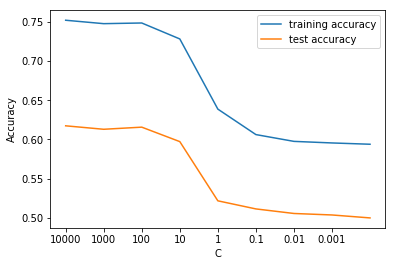

In [12]:
plt.plot(rsquare_train, label="training accuracy")
plt.plot(rsquare_test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xticks(np.arange(8), [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001])
plt.legend()

### 2. Repeat the exact same experiment with the LinearSVC() model. (Two big hints: You don’t have to change your code from the last part very much. Also, you wont need to really understand the workings of the LinearSVC to do this problem.) Plot your test and training scores as in the last problem.

In [13]:
C_range = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
nmc = range(1000)
rsquare_train = []
rsquare_test = []
for c in C_range:
    trainscore = []
    testscore = []
    for i in nmc:
        X,y = make_Class(40)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5)
        LinearSVCMod = LinearSVC(C = c)
        LinearSVCMod.fit(X_train,y_train)
        trainscore.append(LinearSVCMod.score(X_train,y_train))
        testscore.append(LinearSVCMod.score(X_test,y_test))
    mean_train = np.mean(trainscore)
    mean_test = np.mean(testscore)
    rsquare_train.append(mean_train)
    rsquare_test.append(mean_test)

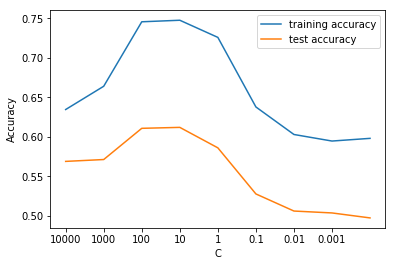

In [14]:
plt.plot(rsquare_train, label="training accuracy")
plt.plot(rsquare_test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.xticks(np.arange(8), [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001])
plt.legend()